In [1]:
import os
os.chdir(r'/Users/ryanmccrickerd/desktop/rypy')

In [8]:
import numpy as np
import pandas as pd
import rypy as rp
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.special import gamma
import mpl
% matplotlib inline

In [9]:
nx = np.newaxis
mpl.config(scale=1.5,print_keys=False)

In [4]:
# RHS = pd.read_csv('RoughHestonSurface.csv')
# RHS = pd.read_csv('rHeston (V0=0.02, nu=0.3,H=0.1,rho=-0.7).csv')
# RHS = pd.read_csv('rHeston (V0=0.02, nu=0.3,H=0.05,rho=-0.7).csv')
# RHS = pd.read_csv('rHeston V0=0.02nu=0.3H=0.01rho=-0.7.csv')
RHS = pd.read_csv('rHeston-V0=0.02-nu=0.3-H=0.05-rho=-0.7.csv')
RHS

,﻿rHeston,1w,2w,1m,3m,6m,1y
0,0.3069,9.4464,0.0000,0.9225,0.5459,0.4634,0.3934
1,0.3308,7.9894,1.2744,0.8660,0.5349,0.4489,0.3809
2,0.3566,6.2920,0.0000,0.8100,0.5165,0.4341,0.3681
3,0.3843,3.8565,0.0000,0.7546,0.4953,0.4181,0.3549
4,0.4143,1.5310,0.9909,0.6998,0.4735,0.4018,0.3412
5,0.4465,0.0000,0.0000,0.6461,0.4519,0.3850,0.3269
6,0.4813,1.0850,0.8432,0.5948,0.4305,0.3672,0.3121
7,0.5188,1.0616,0.0000,0.5477,0.4085,0.3487,0.2966
8,0.5592,0.0000,0.6546,0.5059,0.3856,0.3293,0.2804
9,0.6028,0.0000,0.5647,0.4679,0.3613,0.3087,0.2633


In [5]:
K = np.array(RHS.iloc[:,0])
K

array([ 0.3069,  0.3308,  0.3566,  0.3843,  0.4143,  0.4465,  0.4813,
        0.5188,  0.5592,  0.6028,  0.6497,  0.7003,  0.7548,  0.7837,
        0.7985,  0.8136,  0.829 ,  0.8447,  0.8607,  0.877 ,  0.8936,
        0.9105,  0.9277,  0.9453,  0.9632,  0.9814,  1.    ,  1.0189,
        1.0382,  1.0779,  1.0983,  1.1191,  1.1403,  1.1838,  1.2291])

I think vol-vol $v=1$ makes sense given EAJ has set $\lambda=\nu$.

In [11]:
# ϵ,TS = 16/256,'16d'
# σ,ρ,v,κ = np.sqrt(0.02),-0.7,1.5,1/ϵ
# # ϵ,TS = 0,'0d'
# # σ,ρ,v,κ = np.sqrt(0.02),-0.7,1,np.inf
# θ = σ,ρ,v,κ

In [255]:
v0 = 0.02
ν = 0.3
H = -0.0#0.05
ρ = -0.7
νH = ν*(0.5 - H)**(H - 0.5)

TS = '1d'
ϵ = 3/256
α = νH*ϵ**(H + 0.5)
β = 1/ϵ
γ = v0
θ = α,β,γ,v0,ρ

In [256]:
νH

0.4242640687119285

In [257]:
T = np.array([1/52,2/52,1/12,3/12,6/12,1])[:,nx]
M = ['1W','2W','1M','3M','6M','1Y']
# Δ = np.linspace(1,99,21)[nx,:]/100
# k = norm.ppf(Δ)*σ*np.sqrt(T)
k = np.log(np.arange(0.30,1.24,0.01))*np.ones_like(T)

In [258]:
pd.DataFrame(k,index=M,columns=k[0,:])

,-1.20397280433,-1.1711829815,-1.13943428319,-1.10866262452,-1.07880966137,-1.0498221245,-1.02165124753,-0.994252273344,-0.967584026262,-0.941608539858,...,0.131028262406,0.139761942375,0.148420005118,0.15700374881,0.165514438478,0.173953307123,0.182321556794,0.190620359609,0.198850858745,0.207014169384
1W,-1.203973,-1.171183,-1.139434,-1.108663,-1.07881,-1.049822,-1.021651,-0.994252,-0.967584,-0.941609,...,0.131028,0.139762,0.14842,0.157004,0.165514,0.173953,0.182322,0.19062,0.198851,0.207014
2W,-1.203973,-1.171183,-1.139434,-1.108663,-1.07881,-1.049822,-1.021651,-0.994252,-0.967584,-0.941609,...,0.131028,0.139762,0.14842,0.157004,0.165514,0.173953,0.182322,0.19062,0.198851,0.207014
1M,-1.203973,-1.171183,-1.139434,-1.108663,-1.07881,-1.049822,-1.021651,-0.994252,-0.967584,-0.941609,...,0.131028,0.139762,0.14842,0.157004,0.165514,0.173953,0.182322,0.19062,0.198851,0.207014
3M,-1.203973,-1.171183,-1.139434,-1.108663,-1.07881,-1.049822,-1.021651,-0.994252,-0.967584,-0.941609,...,0.131028,0.139762,0.14842,0.157004,0.165514,0.173953,0.182322,0.19062,0.198851,0.207014
6M,-1.203973,-1.171183,-1.139434,-1.108663,-1.07881,-1.049822,-1.021651,-0.994252,-0.967584,-0.941609,...,0.131028,0.139762,0.14842,0.157004,0.165514,0.173953,0.182322,0.19062,0.198851,0.207014
1Y,-1.203973,-1.171183,-1.139434,-1.108663,-1.07881,-1.049822,-1.021651,-0.994252,-0.967584,-0.941609,...,0.131028,0.139762,0.14842,0.157004,0.165514,0.173953,0.182322,0.19062,0.198851,0.207014


In [259]:
C = rp.pricer(T,k,θ)

/Users/ryanmccrickerd/Library/anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [260]:
BSV = rp.surface(T,k,C)

In [261]:
pd.DataFrame(BSV,index=M,columns=k[0,:])

,-1.20397280433,-1.1711829815,-1.13943428319,-1.10866262452,-1.07880966137,-1.0498221245,-1.02165124753,-0.994252273344,-0.967584026262,-0.941608539858,...,0.131028262406,0.139761942375,0.148420005118,0.15700374881,0.165514438478,0.173953307123,0.182321556794,0.190620359609,0.198850858745,0.207014169384
1W,1.974099e+00,2.040162,1.000000e-09,1.772250e+00,1.000000e-09,1.738313e+00,1.000000e-09,1.000000e-09,1.000000e-09,1.531098e+00,...,0.180279,1.000000e-09,0.203176,1.000000e-09,0.212745,1.000000e-09,1.000000e-09,2.548406e-01,1.000000e-09,1.000000e-09
2W,1.329412e+00,1.303461,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.089879e+00,1.000000e-09,1.000000e-09,...,0.143470,1.475372e-01,0.151493,1.554046e-01,0.159269,1.611618e-01,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
1M,1.000000e-09,0.725297,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,6.020146e-01,1.000000e-09,5.836797e-01,...,0.112663,1.151849e-01,0.117676,1.201296e-01,0.122539,1.249079e-01,1.272489e-01,1.295356e-01,1.316943e-01,1.339089e-01
3M,1.000000e-09,0.381067,4.045601e-01,4.066534e-01,4.047053e-01,4.000471e-01,3.937278e-01,3.875337e-01,3.827865e-01,3.786615e-01,...,0.098307,9.795980e-02,0.097801,9.780206e-02,0.097936,9.818144e-02,9.851904e-02,9.893304e-02,9.941014e-02,9.993920e-02
6M,3.197177e-01,0.315926,3.122673e-01,3.086699e-01,3.051236e-01,3.016646e-01,2.982576e-01,2.949104e-01,2.916217e-01,2.883734e-01,...,0.110813,1.095132e-01,0.108296,1.071625e-01,0.106114,1.051488e-01,1.042671e-01,1.034665e-01,1.027445e-01,1.020983e-01
1Y,2.471983e-01,0.244792,2.424099e-01,2.400530e-01,2.377789e-01,2.355423e-01,2.333425e-01,2.311932e-01,2.290838e-01,2.270091e-01,...,0.123943,1.230583e-01,0.122189,1.213366e-01,0.120500,1.196805e-01,1.188778e-01,1.180924e-01,1.173245e-01,1.165743e-01


In [262]:
plt.rcParams['figure.figsize'] = [2*1.618*2,2*3]
plt.rcParams['legend.loc'] = 'upper right'

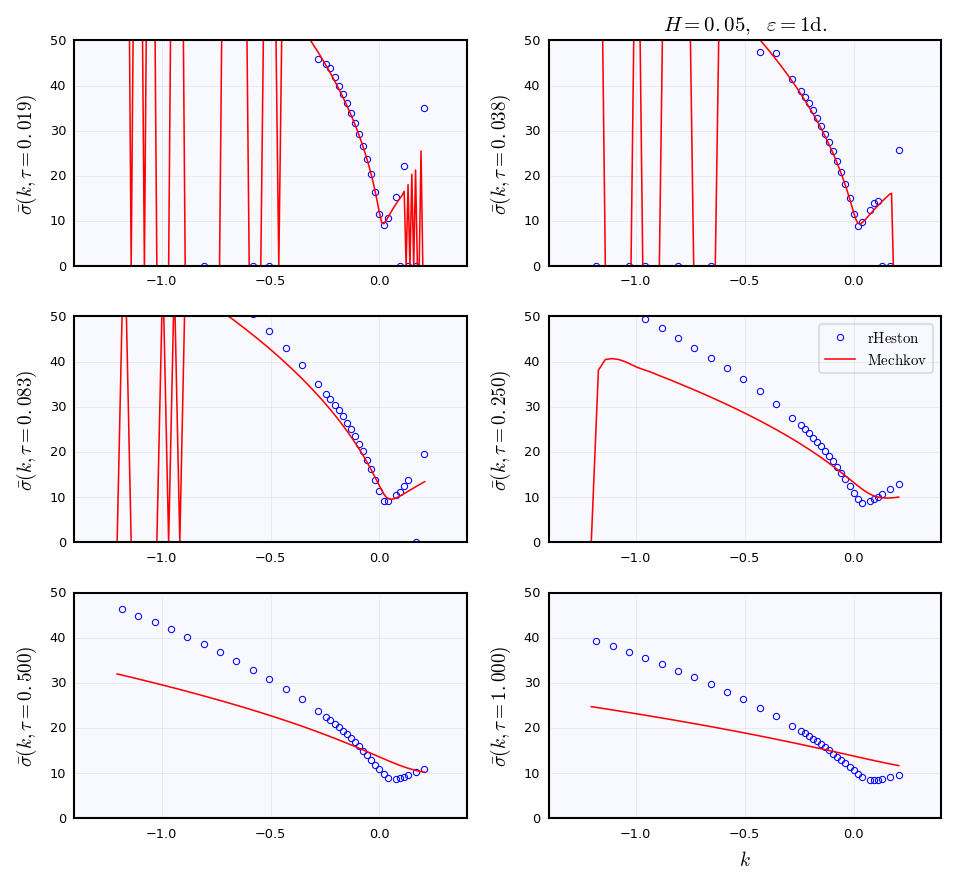

In [263]:
plot,axes = plt.subplots(3,2)
n = -1
for i in range(3):
    for j in range(2):
        n += 1
        axes[i,j].plot(np.log(K),100*np.array(RHS.iloc[:,n+1]),'bo')
        axes[i,j].plot(k[n,:],100*BSV[n,:])
        axes[i,j].set_ylabel(r'$\bar{\sigma}(k,\tau=%.3f)$'%T[n,0])
        axes[i,j].set_ylim([0,50])
axes[0,1].set_title(r'$\varepsilon=\mathrm{%s}.$'%TS)
axes[0,1].set_title(r'$H = 0.05,\ \ \varepsilon=\mathrm{%s}.$'%TS)
axes[1,1].legend([r'$\mathrm{rHeston}$',r'$\mathrm{Mechkov}$'])
axes[2,1].set_xlabel(r'$k$')
plt.tight_layout()
fname = r'rHeston-v-Mechkov-%s'%TS
plt.savefig(fname)